In [2]:
# 1 a
reset()
t, k = var('t, k')
Tm = var('Tm')
T0 = var('T0')

T = function('T')(t)

eqd = diff(T, t) == -k * (T(t) - Tm)
eqd

desolve(eqd, [T, t], [0, T0])

(Tm*e^(k*t) + T0 - Tm)*e^(-k*t)

In [96]:
# 1 b
reset()
t, k = var('t, k')
Tm = var('Tm')
T0 = var('T0')

T = function('T')(t)

eqd = diff(T, t) == -k * (T(t) - Tm)
eqd

sol(Tm, T0, k, t) = desolve(eqd, [T, t], [0, T0])

eq = sol(5, 40, k, 1) == 10
show(eq)
eq = 5+35*e^(-k)==10
eq
solve(eq, k)

#sols = solve(eq, k)
#sols

5*(e^k + 7)*e^(-k) == 10

[k == log(7)]

In [4]:
# 2.a
reset()
t = var('t')
x = function('x')(t)
y = function('y')(t)
deq1 = diff(x,t) == 4*x + 6*y
deq2 = diff(y,t) == 2*x + 3*y
syst = [deq1, deq2]

C1, C2 = var('C1, C2')

solutions = desolve_system(syst, [x,y], [0, C1, C2])

show(solutions)

[x(t) == 2/7*(2*C1 + 3*C2)*e^(7*t) + 3/7*C1 - 6/7*C2,
 y(t) == 1/7*(2*C1 + 3*C2)*e^(7*t) - 2/7*C1 + 4/7*C2]

[x(t) == 20/7*e^(7*t) - 6/7, y(t) == 10/7*e^(7*t) + 4/7]

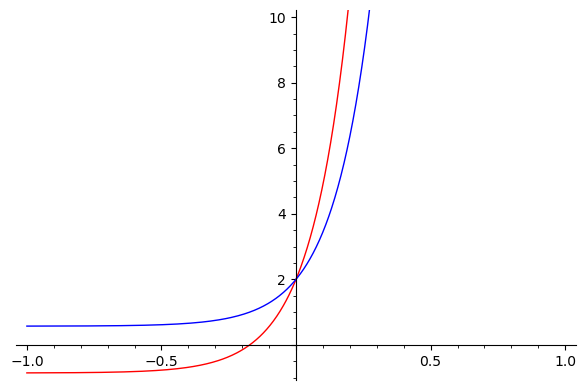

In [13]:
# 2.b
reset()
t = var('t')
x = function('x')(t)
y = function('y')(t)
deq1 = diff(x,t) == 4*x + 6*y
deq2 = diff(y,t) == 2*x + 3*y
syst = [deq1, deq2]

C1, C2 = var('C1, C2')

solutions = desolve_system(syst, [x,y], [0, 2, 2])

sol_x(t)=solutions[0].rhs()
sol_y(t)=solutions[1].rhs()

g1 = plot(sol_x(t),t,-1,1, ymax=10, color='red')
g2 = plot(sol_y(t),t,-1,1, ymax=10)

show(solutions)
show(g1+g2)

In [25]:
# 3 a

reset()
x = var('x')

f = function('f')(x)

f = x*(2-x)*(x-4)

pts = [sol.rhs() for sol in solve(f(x)==0,x)]

for px in pts:
    show(px)    
    d=diff(f)(px)    
    if d>0:
        show(" local asimptotic stabil")
    else:
        show(" instabil")
    

0

' instabil'

2

' local asimptotic stabil'

4

' instabil'

1/4*log(x(t) - 2) - 1/8*log(x(t) - 4) - 1/8*log(x(t)) == t + 1/4*log(C - 2) - 1/8*log(C - 4) - 1/8*log(C)

(v - 2)^2/((v - 4)*v) == (C - 2)^2*e^u/((C - 4)*C)

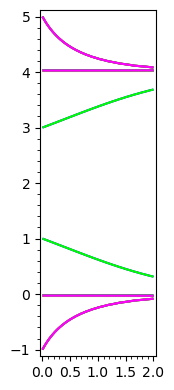

In [91]:
# 3 b

t = var('t')
x = function('x')(t)

deq = diff(x,t) == x(t)*(2-x(t))*(x(t)-4)

C = var('C')

sol(C,t) = desolve(deq, [x,t], [0, C])
show(sol(C,t).log_simplify()) # implicita

u=var('u')
v=var('v')


fr(C,u,v)=((v-2)^2)/((v-4)*v) == e^u * (C-2)^2/((C-4)*C)
show(fr(C))
g1=implicit_plot(fr(-1,u,v),[u,0,2],[v,-1,5], color="red")
g2=implicit_plot(fr(-1,u,v),[u,0,2],[v,-1,5], color="green")
g3=implicit_plot(fr(1,u,v),[u,0,2],[v,-1,5], color="blue")
g4=implicit_plot(fr(2,u,v),[u,0,2],[v,-1,5], color="orange")
g5=implicit_plot(fr(3,u,v),[u,0,2],[v,-1,5], color="lime")
g6=implicit_plot(fr(5,u,v),[u,0,2],[v,-1,5], color="gray")
g7=implicit_plot(fr(5,u,v),[u,0,2],[v,-1,5], color="magenta")

g1+g2+g3+g4+g5+g6+g7

#implicit_plot(sol(-1,t), [t,-1,1], [x,-1,1] )

[[x == (-2*I), y == (1/2*I)], [x == (2*I), y == (-1/2*I)], [x == 2, y == (1/2)], [x == -2, y == (-1/2)]]

2 ', ' 1/2 ' instabil de tip sa'

[-1/4*sqrt(1217) - 31/4, 1/4*sqrt(1217) - 31/4]

-2 ', ' -1/2 ' instabil de tip sa'

[-1/4*sqrt(1217) + 31/4, 1/4*sqrt(1217) + 31/4]

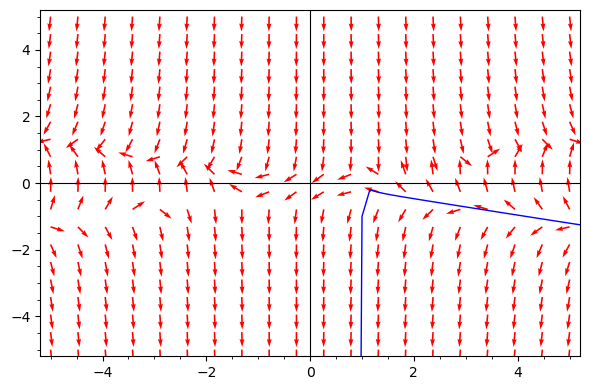

In [95]:
# 4a

reset()

x,y,t = var('x,y,t')

f1(x,y) = x*y-1
f2(x,y) = x^2-16*y^2


EquilP = solve([f1(x,y)==0, f2(x,y)==0],x,y)
show(EquilP)

J=jacobian((f1(x,y),f2(x,y)),(x,y))

for sol in EquilP:
    xs=sol[0].rhs()
    ys=sol[1].rhs()
    if not xs in RR:
        continue
    ev = J(x=xs, y=ys).eigenvalues()    
    l1=ev[0]
    l2=ev[1]
    if l1 in RR:
        if l1>0 and l2>0:
            show(xs,", ",ys," instabil de tip nod")
        elif l2>0:
            show(xs,", ",ys," instabil de tip sa")
        else:
            show(xs,", ",ys," stabil...")
    else:
        show(xs,", ",ys," local asimptotic stabil tip focus")
        
    show(ev)
    

n=sqrt(f1(x,y)^2+f2(x,y)^2)
g=plot_vector_field([f1(x,y)/n, f2(x,y)/n], [x,-5,5], [y,-5,5], color='red')

P = desolve_system_rk4([f1(x,y), f2(x,y)], [x,y], ics=[0,1,-1], ivar=t, end_points=[-3,3])
XY = [[j,k] for i,j,k in P]
l1 = list_plot(XY, plotjoined=True, color='blue')

pl=g+l1
pl.show(xmin=-5, xmax=5, ymin=-5, ymax=5)

